# Carbon Tax Observations

### CS2545 - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###
<br>

#### Group Members 

Chi Seng, Cheang | 3762588

Riley, Legere | 3756232

Matthew, Chiasson | 3725675



#### Project Proposal :
Economic activities and cost analysis in Canada
(Analyzing grocery price trends)

#### Issues addressed:  
Concerns about rising grocery costs in Canada (Reasons/Causes) since the genesis of carbon Tax.
Methodology: We will look at price trends in grocery costs throughout the year with a focus on the transition between first to second quarter (the tax season). Our approach will be mostly concerned with animal products that have a large carbon footprint. We are also interested in how the Carbon Tax affects other food products, say those that involve heavy transportation costs; Like Seafood. 


# Data Set Sources:

> [Industrial product price index, food and beverage products, monthly:](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810026603)

> [Raw materials price index for crop products, animals and animal products, monthly:](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=181002680)

> [Monthly average retail prices for selected products: Food](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810024502)

Plan: 
source when carbon tax was implemented in 2016 and how much

source how hard canadian farmers where impacted

Source the base inflation rate over the years 2015 - 2019

create dataframes for prices over the years 2015 - 2019

find mean price increasce and mean inflation rate. subtract inflation from price increace.



# Introduction
Our project aims to analyze the price trends on grocery items and its root cause, with a heavy emphasis on the relevance of Carbon Tax onto the Canadian economy. We hypothesize that since the introduction of the Carbon Tax on a federal level in 2019 (some provinces have had Carbon Tax since 2016 [1]), grocery prices have been steadily rising due to fuel consumption and a rising population; Paired with the Covid-19 pandemic, prices of groceries have since been increased to new heights and have not been decreasing gradually as much as its causes have been increasing. 

## Project Goal

For the gaol of this project we aim to show the impact that the carbon tax has had on the cost of our groceries from 2019 (the time Carbon tax was imposed nation wide) to 2024 (Date farmers recived exemtion on certain items). To do this we will first get the inflation rate for each year, then the mean cost increase of groceries for that year. Then we can compare how much the cost increase was due to inflation that yean and can attribute the rest to the carbon tax (and other factors that will be explored).

## Base inflation rates

Inflation is defined as the rate where the cost of products increase or the rate in which a currency depreciates relative to its purchasing power. The preferred global inflation rate of many governments have been kept at approximately 2% annually to stimulate economic growth which is the case for Canada as well. A manageable inflation rate can be used to spur investments and economic growth despite its common association with risks such as weakening currency.

Canada's inflation rate is measured using the Consumer Price Index(CPI), which is calculated annually and weighted against a basis year such as 2002. Our report will focus on comparing the CPI of earlier time periods against the time period after Carbon Tax was introduced in order to gain a better understanding of its role in grocery price inflation. Historically Canada's inflation rate was kept around 2% per annum, as shown by the line chart below.

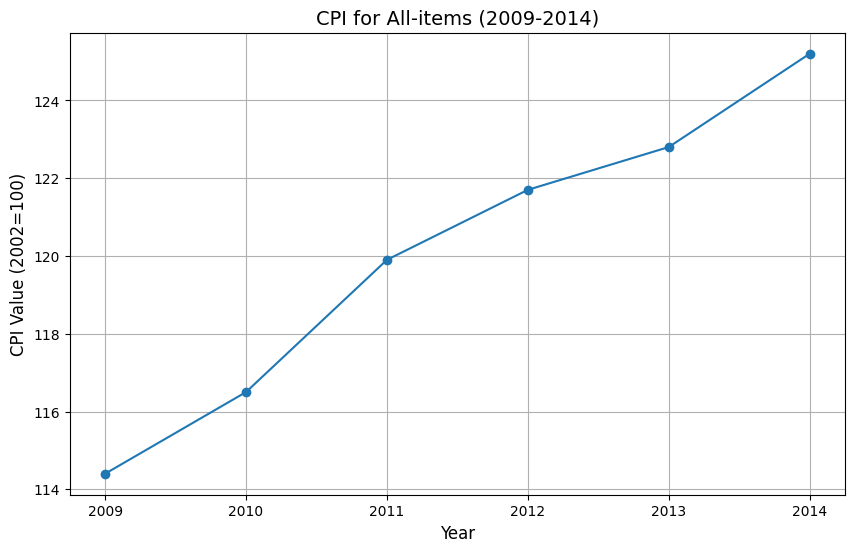

In [39]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

cpi_2009 = pd.read_csv('Sources/2009-2014CPI.csv', sep=',', skiprows=10, nrows=16)
cpi_2019 = pd.read_csv('Sources/2019-2024CPI.csv', sep=',', skiprows=10, nrows=16)
cpi_2009 = cpi_2009.dropna()
cpi_2019 = cpi_2019.dropna()

first_row = cpi_2009.iloc[0]
years = ['2009', '2010', '2011', '2012', '2013', '2014']
values = first_row.iloc[1:7].values

first_row_19 = cpi_2019.iloc[0]
years_19 = ['2019', '2020', '2021', '2022', '2023', '2024']
values_19 = first_row_19.iloc[1:7].values

plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o')

# Add title and labels
product_name = first_row.iloc[0]  # Get the product name 'All-items'
plt.title(f"CPI for {product_name} (2009-2014)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value (2002=100)', fontsize=12)
plt.grid(True)
plt.show()





In [40]:
min_wage = pd.read_csv("Sources/Minimum wage in Canada.csv", sep=',')
min_wage


,Jurisdiction,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 21,Unnamed: 22
0,Alberta,01-Sep-05,NaN,01-Sep-07,01-Apr-08,01-Apr-09,NaN,01-Sep-11,01-Sep-12,01-Sep-13,...,01-Oct-17,01-Oct-18,26-Jun-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,$7.00,NaN,$8.00,$8.40,$8.80,NaN,$9.40,$9.75,$9.95,...,$13.60,$15.00,$15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,British Columbia,NaN,NaN,NaN,NaN,NaN,NaN,01-May-11,01-May-12,NaN,...,15-Sep-17,01-Jun-18,01-Jun-19,01-Jun-20,01-Jun-21,01-Jun-22,01-Jun-23,01-Jun-24,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$8.75,$10.25,NaN,...,$11.35,$12.65,$13.85,$14.60,$15.20,$15.65,$16.75,$17.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-May-12,NaN,...,NaN,NaN,NaN,NaN,01-Aug-21,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$10.30,NaN,...,NaN,NaN,NaN,NaN,$15.20,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29-Dec-21,01-Apr-22,01-Apr-23,01-Apr-24,NaN,NaN


# Introduction of the Carbon Tax

Canada introduced a nationwide carbon pricing system in 2019, establishing a federal minimum price on carbon pollution starting at $20 per tonne. This system ensured that all provinces and territories had carbon pricing in place, either through their own compliant systems or the federal "backstop," aligning with national benchmark standards [[3]](https://www.canada.ca/en/environment-climate-change/services/climate-change/pricing-pollution-how-it-will-work/carbon-pollution-pricing-federal-benchmark-information.html).


## Tax on the farmers

Farmers are paying significant amounts in carbon tax, with livestock farmers averaging $726 per month and crop farmers around $2,024, according to the ACA. Greenhouse operators face the highest costs, averaging $17,173 monthly, with carbon tax making up as much as 40% of some farmers' energy expenses [[4]](https://www.taxpayer.com/newsroom/majority-of-canadians-want-carbon-tax-scrapped-on-farms#:~:text=The%20average%20livestock%20farmer%20can,cost%20is%20just%20carbon%20tax.).  To help offset these costs, the federal government introduced a refundable tax credit for farming businesses in provinces where the federal fuel charge applies. Eligible farmers can claim this credit for fuel expenses incurred in 2023, with the exemption taking effect for Atlantic provinces on July 1, 2023 [[5]](https://www.canada.ca/en/department-finance/programs/tax-policy/tax-credit-payment-rates-to-return-fuel-charge-proceeds-to-farmers-for-2023-24.html).



In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ppi = pd.read_csv('Sources/Industrial product price index monthly 2019 - 2023.csv', sep=',', skiprows=9, nrows=16)
ppi

,North American Product Classification System (NAPCS),January 2019,February 2019,March 2019,April 2019,May 2019,June 2019,July 2019,August 2019,September 2019,...,October 2022,November 2022,December 2022,January 2023,February 2023,March 2023,April 2023,May 2023,June 2023,July 2023
0,NaN,"Index, 202001=100",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Meat, fish and dairy products",95.2,94.5,95.7,98.7,99.6,99.3,97.4,100.1,96.6,...,113.9,113.7,113.1,112.8,114.1,115.4,116.8,119.4,120.4,118.1
2,Prepared and packaged seafood products,96.9,96.7,97.4,97.8,101.1,101.1,100.3,100.3,99.9,...,104.1,103.9,104.0,104.1,104.3,103.3,103.8,103.7,103.7,106.5
3,Meat products,93.0,92.2,94.1,98.4,99.4,98.8,95.9,100.2,94.8,...,115.9,115.0,114.3,114.2,115.1,117.0,119.2,123.3,124.8,120.8
4,Fresh and frozen beef and veal,96.6,95.3,97.1,99.6,100.7,96.9,93.7,96.1,94.0,...,118.5,124.5,128.0,135.6,136.0,145.7,147.9,149.8,155.7,140.2
5,Fresh and frozen pork,87.1,85.5,90.3,101.4,103.3,102.8,95.5,105.0,92.4,...,90.9,86.1,80.9,79.1,76.3,74.6,80.7,83.9,84.9,85.1
6,Fresh and frozen poultry of all types,93.5,94.6,94.4,95.8,96.9,98.3,99.0,99.1,98.4,...,126.7,122.1,120.4,112.3,117.2,118.1,117.6,128.4,127.0,126.7
7,"Fresh and frozen lamb, mutton and goat meat",103.2E,93.8E,90.5E,97.3E,96.5E,109.1E,102.7E,91.1E,102.2E,...,113.0,108.2,108.6,108.6,108.7,100.0,100.0,100.7,95.3,95.4
8,"Processed meat products, other meats, and anim...",98.3,97.6,97.2,96.8,96.2,98.0,98.6,101.8,98.1,...,130.2,130.0,130.4,130.9,133.0,131.8,132.5,133.9,134.3,134.3
9,"Ham, bacon and other processed pork",97.4,97.4,95.4,99.4,97.2,98.6,101.1,109.6,101.3,...,132.3,134.0,133.0,134.6,138.4,136.1,136.7,137.8,138.4,138.8


In [42]:
carbon_tax = pd.read_csv("Sources\Carbon tax rates.csv")
carbon_tax = carbon_tax.dropna()
carbon_tax = carbon_tax.set_index('Type')
carbon_tax = carbon_tax.drop(['Unit'], axis=1)
carbon_tax

,"April 1, 2019 to March 31, 2020","April 1, 2020 to March 31, 2021","April 1, 2021 to March 31, 2022","April 1, 2022 to March 31, 2023","April 1, 2023 to March 31, 2024","April 1, 2024 to March 31, 2025"
Type,,,,,,
Aviation gasoline,0.0498,0.0747,0.0995,0.1244,0.1592,0.1959
Aviation turbo fuel,0.0516,0.0775,0.1033,0.1291,0.1678,0.2065
Butane,0.0356,0.0534,0.0712,0.0890,0.1157,0.1424
Coke,63.5900,95.3900,127.1900,158.9900,206.6800,254.3800
Coke oven gas,0.0140,0.0210,0.0280,0.0350,0.0455,0.0560
Combustible waste,39.9500,59.9200,79.8900,99.8700,129.8200,159.7800
Ethane,0.0204,0.0306,0.0408,0.0509,0.0662,0.0815
Gas liquids,0.0333,0.0499,0.0666,0.0832,0.1081,0.1331
Gasoline,0.0442,0.0663,0.0884,0.1105,0.1431,0.1761


# Change in inflation rate relative to carbon tax rate


C:\Users\riley\AppData\Local\Temp\ipykernel_30548\646386790.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2009 = df2009.pct_change()
C:\Users\riley\AppData\Local\Temp\ipykernel_30548\646386790.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2019 = df2019.pct_change()


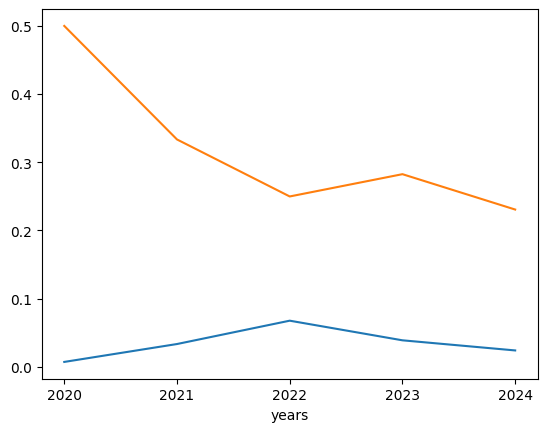

In [58]:
ct_pct = carbon_tax.pct_change(axis=1, periods=1)
ct_pct = ct_pct.mean(axis=0)

df2009 = pd.Series(data=values, index=years)
df2009 = df2009.pct_change()

df2019 = pd.Series(data=values_19, index=years_19)
df2019 = df2019.pct_change()

plt.plot(years_19, df2019.values)
plt.plot(years_19, ct_pct.values)
plt.xlabel('years')
plt.show()


# Sources:

1. https://energynow.ca/2016/12/brief-history-canadian-carbon-tax/
2. https://www.thecanadianencyclopedia.ca/en/article/carbon-pricing-in-canada
3. https://www.canada.ca/en/environment-climate-change/services/climate-change/pricing-pollution-how-it-will-work/carbon-pollution-pricing-federal-benchmark-information.html
4. https://www.taxpayer.com/newsroom/majority-of-canadians-want-carbon-tax-scrapped-on-farms#:~:text=The%20average%20livestock%20farmer%20can,cost%20is%20just%20carbon%20tax.
5. https://www.canada.ca/en/department-finance/programs/tax-policy/tax-credit-payment-rates-to-return-fuel-charge-proceeds-to-farmers-for-2023-24.html